In [20]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                                
library(ggplot2)
library(gganimate) # install by devtools::install_github("thomasp85/gganimate")
library(gifski)

library(IRdisplay)
library(base64enc)

display_gif = function(a=last_animation()) { fn = tempfile(fileext=".gif"); anim_save(fn, a); display_html(sprintf("<img src=\"data:image/gif;base64,%s\">", base64encode(fn))) }
animate.inline = function(...) { display_gif(animate(...)) } 


In [21]:
data_b4 = read.csv("b4_alldate.csv")
data_b5 = read.csv("b5_alldate.csv")
data_b3 = read.csv('b3_alldate.csv')

# data_b5 = data_b5[0:336,]

In [28]:
reduce.dataframe = function(df){
    return (data.frame(df['DeviceId'],df['Longitude'], df['Latitude'], df['numerictime'], df['fivemintimeStart'], df['fivemintimeEnd']))
#     return (data.frame(df$DeviceId,df$Longitude, df$Latitude, df$numerictime, df$fivemintimeStart, df$fivemintimeStart))
}

In [32]:
reduced_data_b3 = reduce.dataframe(data_b3)
reduced_data_b4 = reduce.dataframe(data_b4)
reduced_data_b5 = reduce.dataframe(data_b5)

# size(reduced_data_b3)
# size(reduced_data_b4)
# size(reduced_data_b5)

In [35]:
head(reduced_data_b5[0:336,], 5)
head(reduced_data_b5[337:672,], 5)

,DeviceId,Longitude,Latitude,numerictime,fivemintimeStart,fivemintimeEnd
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,b5,-83.56107,40.31783,1629375209,1629375000,1629375300
2,b5,-83.56107,40.31783,1629375209,1629375000,1629375300
3,b5,-83.56109,40.31780,1629375209,1629375000,1629375300
4,b5,-83.56111,40.31777,1629375209,1629375000,1629375300
5,b5,-83.56111,40.31775,1629375209,1629375000,1629375300


,DeviceId,Longitude,Latitude,numerictime,fivemintimeStart,fivemintimeEnd
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
337,b5,-83.54539,40.30812,1629386771,1629386700,1629387000
338,b5,-83.54542,40.30812,1629386771,1629386700,1629387000
339,b5,-83.54542,40.30812,1629386771,1629386700,1629387000
340,b5,-83.54549,40.30820,1629386771,1629386700,1629387000
341,b5,-83.54358,40.30564,1629386771,1629386700,1629387000


In [6]:
reduced_data_b4$temperature = 100
reduced_data_b4$temperature[reduced_data_b4$fivemintimeStart < mean(range(reduced_data_b4$fivemintimeStart))] = 90
reduced_data_b4$alarm = reduced_data_b4$temperature > 95

In [7]:
reduced_data_b5$temperature = 110
reduced_data_b5$temperature[reduced_data_b5$fivemintimeStart < mean(range(reduced_data_b5$fivemintimeStart))] = 90
reduced_data_b5$alarm = reduced_data_b5$temperature > 95


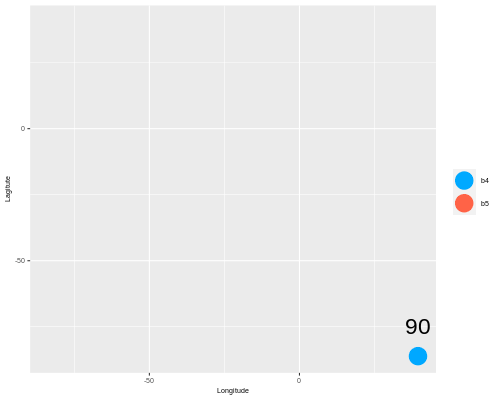

In [8]:
p <- ggplot(
  rbind(reduced_data_b5, reduced_data_b4), 
  aes(x = Longitude, y=Latitude, colour = DeviceId), size=50) +
#     aes(x = Longitude, y=as.numeric(as.factor(DeviceId)), colour = DeviceId), size=50) +
#   geom_point(show.legend = TRUE, alpha = 1, size=8) +
  geom_text(aes(label=temperature), color='black', size=8) + 
  geom_point(show.legend = FALSE, aes(alpha = as.numeric(alarm)), color='gold', size=16) +
  geom_point(show.legend = TRUE, alpha = 1, size=8) +
  scale_alpha(guide = 'none', range = c(0, 1)) + 
  labs(x = "Longitude", y = "Lagitute")
# p

animate.inline(p + transition_time(fivemintimeStart), fps=5, duration=10, end_pause=20, width=500, height=400)